# Imports

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import glob

# File reading

In [7]:
def readDotFit(path):
    f1 = open(path, "r")

    #ignore first 12 lines - s will serve as garbage bin
    for i in range(0, 12):
        s = f1.readline()

    #because there is a space between the [ and the first number, lines can be processed using split(" ")
    energy1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])
    ydata1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])
    yfit1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])
    bg1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])

    f1.close()

    return energy1, ydata1, yfit1, bg1

In [8]:
dat = {"10s": readDotFit(glob.glob("10s_report/*.fit")[0]),
       "20s": readDotFit(glob.glob("20s_report/*.fit")[0]),
       "30s": readDotFit(glob.glob("30s_report/*.fit")[0]),
       "60s": readDotFit(glob.glob("60s_report/*.fit")[0]),
       "2m": readDotFit(glob.glob("2m_report/*.fit")[0]),
       "5m": readDotFit(glob.glob("5m_report/*.fit")[0]),
       "10m": readDotFit(glob.glob("10m_report/*.fit")[0]),
       "20m": readDotFit(glob.glob("20m_report/*.fit")[0]),
       "30m": readDotFit(glob.glob("30m_report/*.fit")[0]),
       "60m": readDotFit(glob.glob("60m_report/*.fit")[0])}

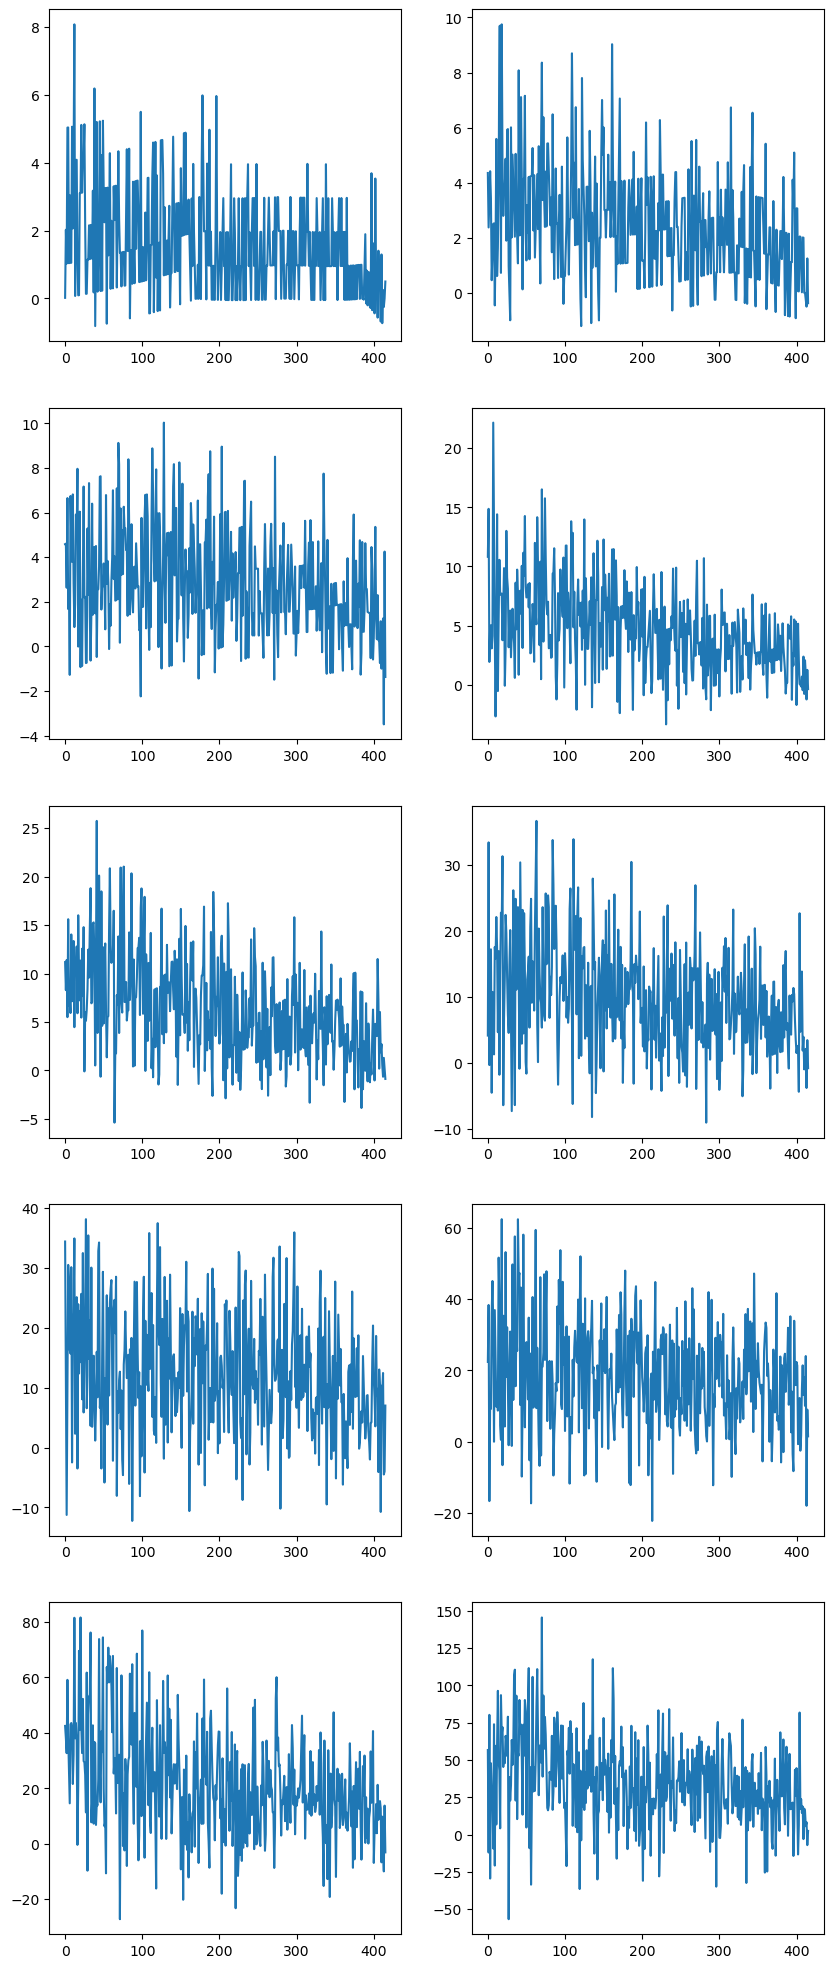

In [17]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs[0][0].plot(dat["10s"][1][2500:] - dat["10s"][3][2500:])
axs[0][1].plot(dat["20s"][1][2500:] - dat["20s"][3][2500:])
axs[1][0].plot(dat["30s"][1][2500:] - dat["30s"][3][2500:])
axs[1][1].plot(dat["60s"][1][2500:] - dat["60s"][3][2500:])
axs[2][0].plot(dat["2m"][1][2500:] - dat["2m"][3][2500:])
axs[2][1].plot(dat["5m"][1][2500:] - dat["5m"][3][2500:])
axs[3][0].plot(dat["10m"][1][2500:] - dat["10m"][3][2500:])
axs[3][1].plot(dat["20m"][1][2500:] - dat["20m"][3][2500:])
axs[4][0].plot(dat["30m"][1][2500:] - dat["30m"][3][2500:])
axs[4][1].plot(dat["60m"][1][2500:] - dat["60m"][3][2500:])


plt.show()